In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv("diabetes.csv")
# Print shape of dataset
print(df1.shape)

(768, 9)


In [35]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [38]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=3)

imputed_df = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)
imputed_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,125.333333,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,66.666667,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,30.000000,195.000000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.000000,166.666667,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,35.333333,120.666667,30.1,0.349,47.0,1.0


In [40]:
X=imputed_df.drop('Outcome',axis=1)
y=imputed_df['Outcome']

In [41]:
from imblearn.combine import SMOTEENN

smt=SMOTEENN(random_state=42,sampling_strategy='minority')
print("before sampling target data has 0 and 1 with ",np.bincount(y)," values and difference between them is",abs(np.diff((np.bincount(y)))))
X_res,y_res=smt.fit_resample(X,y)
print("after sampling target data has 0 and 1 with  ",np.bincount(y_res)," values and difference between them is",abs(np.diff((np.bincount(y_res)))))

before sampling target data has 0 and 1 with  [500 268]  values and difference between them is [232]
after sampling target data has 0 and 1 with   [239 317]  values and difference between them is [78]


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=42)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,\
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [44]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    f1 = f1_score(true, predicted) # Calculate F1-score
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, precision, recall, f1 , roc_auc

In [45]:
models = {
    "Decision Tree": DecisionTreeClassifier(),

}

Decision Tree
Model performance for Test set:
- Accuracy: 0.9581
- ROC AUC Score: 0.9570
[[74  5]
 [ 2 86]]


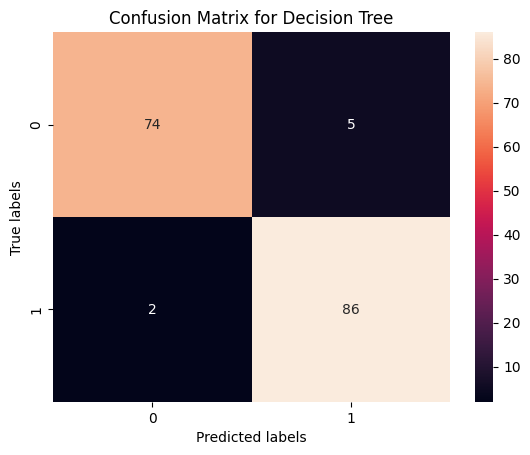

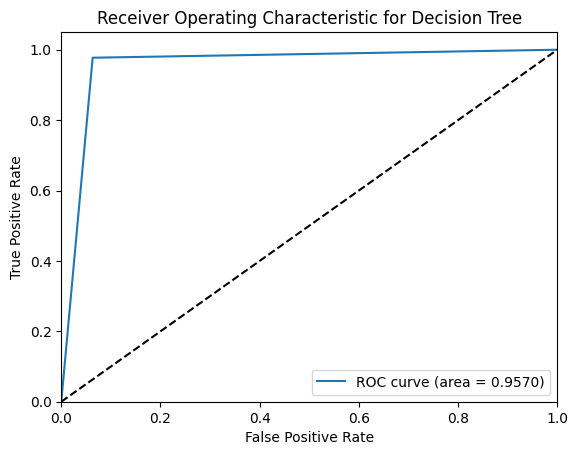

In [47]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


model_name = 'Decision Tree'
model = models[model_name]

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_test_pred = model.predict(X_test)

# Model performance
accuracy = model.score(X_test, y_test)
auc_value = roc_auc_score(y_test, y_test_pred)

print(model_name)
print('Model performance for Test set:')
print('- Accuracy: {:.4f}'.format(accuracy))
print('- ROC AUC Score: {:.4f}'.format(auc_value))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for ' + model_name)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr, label='ROC curve (area = {:.4f})'.format(auc_value))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for ' + model_name)
plt.legend(loc='lower right')
plt.show()


In [ ]:
co=df1.corr()

In [ ]:
co

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<Axes: >

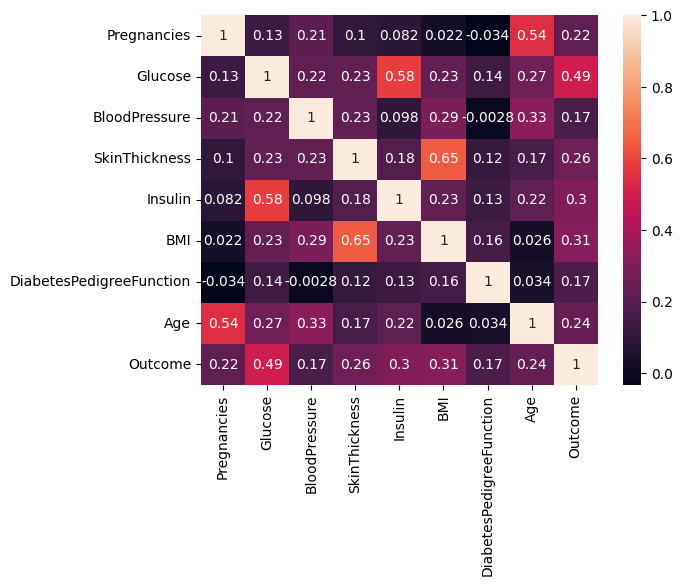

In [ ]:
import seaborn as sns
sns.heatmap(co,annot=True)

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
cv_scores = cross_val_score(pipeline, X_res, y_res, cv=kfold, scoring='accuracy')

In [ ]:
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.94642857 0.96428571 0.94642857 0.94642857 0.89285714 1.
 0.92727273 0.94545455 0.94545455 0.98181818]
Mean Accuracy: 0.9496428571428572
